### Geocode NYC Schools
OOO:
1. Pull NYC Schools data
2. Pull in Neighborhood Boundary shapefile
3. Assign each school to a neighborhood

In [3]:
### set up 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

In [4]:
### read in nyc schools location data
schools = pd.read_csv('data/2019_-_2020_School_Locations.csv')
schools.describe()
# convert to geodataframe using Lat and Lon
schools['geometry'] = schools.apply(lambda x: wkt.loads(f'POINT ({x.LONGITUDE} {x.LATITUDE})'), axis=1)
schools = gpd.GeoDataFrame(schools, geometry='geometry')
# ensure schools has a valid CRS
schools.set_crs(epsg=4326, inplace=True) # WGS 84

,fiscal_year,system_code,location_code,location_name,BEDS,Managed_by_name,location_type_description,Location_Category_Description,Grades_text,Grades_final_text,...,community_school_sup_name,Tier_3_Support_Location_Name,Tier_3_Support_Leader_Name,Tier_2_Support_Location_Name,HighSchool_Network_Location_Code,HighSchool_Network_Name,HighSchool_Network_Superintendent,Community_district 1,Police_precinct,geometry
0,2020,15K001,K001,P.S. 001 The Bergen,331500010001,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,"SKOP, ANITA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 5- Brooklyn North,NaN,NaN,NaN,307.0,72.0,POINT (-74.01142 40.64896)
1,2020,17K002,K002,Parkside Preparatory Academy,331700010002,DOE,General Academic,Junior High-Intermediate-Middle,"06,07,08,SE","06,07,08",...,"ELLIS, CLARENCE",NYCDOE Borough Office - Brooklyn South,Mauriciere de Govia,School Support Team 2- Brooklyn South,NaN,NaN,NaN,309.0,71.0,POINT (-73.95158 40.65642)
2,2020,13K003,K003,P.S. 003 The Bedford Village,331300010003,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,"SAMUELS, KAMAR",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 3- Brooklyn North,NaN,NaN,NaN,303.0,79.0,POINT (-73.95522 40.68231)
3,2020,75K004,K004,P.S. K004,307500013004,DOE,Special Education,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05,06,07,SE",...,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 752,NaN,NaN,NaN,305.0,75.0,POINT (-73.87928 40.6585)
4,2020,16K005,K005,P.S. 005 Dr. Ronald McNair,331600010005,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,"MARTIN, YOLANDA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 4- Brooklyn North,NaN,NaN,NaN,303.0,81.0,POINT (-73.92197 40.68524)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2020,84X729,X729,Readnet Bronx Charter School,320700860842,Charter,General Academic,Elementary,"01,02",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.0,40.0,POINT (-73.917 40.8149)
2186,2020,84X730,X730,Bronx Charter School for the Arts,320800860846,Charter,General Academic,Elementary,"0K,01,02,03,04,05,06,07","0K,01,02,03,04,05,06,07,08",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,41.0,POINT (-73.88648 40.82182)
2187,2020,75X754,X754,J. M. Rapport School Career Development,307500012754,DOE,Special Education,High school,"09,10,11,12,SE","09,10,11,12,SE",...,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 755,NaN,NaN,NaN,201.0,40.0,POINT (-73.90936 40.81105)
2188,2020,75X811,X811,P.S. X811,307500012811,DOE,Special Education,Secondary School,"08,09,10,11,12,SE","07,08,09,10,11,12,SE",...,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 755,NaN,NaN,NaN,203.0,42.0,POINT (-73.8868 40.83055)


In [5]:
## pull in neighborhood boundary data 
neighborhoods = gpd.read_file('data/2020_NTA.csv')
# neighborhoods.head()
# convert the_geom to geometry
neighborhoods['geometry'] = neighborhoods['the_geom'].apply(wkt.loads)
neighborhoods = gpd.GeoDataFrame(neighborhoods, geometry='geometry')

In [6]:
# look at neighborhoods, ensure that each neighborhood has a name and ID 
neighborhoods.head()
# confirm every neighborhood has an NTA name and NTA2020 ID
print(neighborhoods['NTAName'].isnull().sum())
print(neighborhoods['NTA2020'].isnull().sum())

# set CRS for neighborhoods to match schools
neighborhoods.set_crs(epsg=4326, inplace=True) # WGS 84

0
0


,the_geom,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape_Leng,Shape_Area,geometry
0,MULTIPOLYGON (((-73.93213397515774 40.72815960...,3,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.5663222,35321206.6726,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,MULTIPOLYGON (((-73.96176070350778 40.72522879...,3,Brooklyn,047,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.0270184,28854314.2319,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ..."
2,MULTIPOLYGON (((-73.95023693757913 40.70547324...,3,Brooklyn,047,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2802623,15208960.6551,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,MULTIPOLYGON (((-73.92405909736993 40.71411156...,3,Brooklyn,047,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.7730868,52266211.208,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,MULTIPOLYGON (((-73.9923636697722 40.689690123...,3,Brooklyn,047,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.5048671,9982321.60824,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,MULTIPOLYGON (((-74.20058400025061 40.57951100...,5,Staten Island,085,SI0391,Freshkills Park (South),FrshklPK_S,9,SI03,SI03 South Shore (CD 3 Approximation),33945.4204122,47758768.0577,"MULTIPOLYGON (((-74.20058 40.57951, -74.19888 ..."
258,MULTIPOLYGON (((-74.05974734759452 40.59384861...,5,Staten Island,085,SI9561,Fort Wadsworth,FtWdswrth,6,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,14814.4147411,9867248.986,"MULTIPOLYGON (((-74.05975 40.59385, -74.06013 ..."
259,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,Staten Island,085,SI9591,Hoffman & Swinburne Islands,HffmnIsl,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,4743.12812675,635701.967583,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
260,MULTIPOLYGON (((-74.08469075991493 40.57147791...,5,Staten Island,085,SI9592,Miller Field,MllrFld,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,19197.2009732,10866804.1436,"MULTIPOLYGON (((-74.08469 40.57148, -74.08595 ..."


<Axes: >

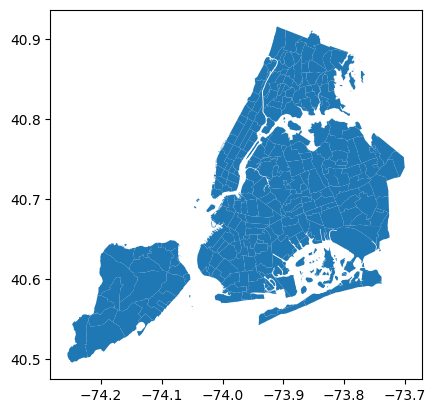

In [7]:
neighborhoods.plot()

In [8]:
# merge schools and assign to neighborhoods
schools_neighborhoods = gpd.sjoin(schools, neighborhoods, how='left', )

In [9]:
# check that each school is assigned a neighborhood using NTAName and NTA2020 (the id)
print(schools_neighborhoods['NTAName'].isnull().sum())
print(schools_neighborhoods['NTA2020'].isnull().sum())
# investigate schools that are not assigned a neighborhood
schools_neighborhoods[schools_neighborhoods['NTAName'].isnull()]
# ok most of these seem like charter schools, special ed or alternative schools, so we can remove them for now
schools_neighborhoods = schools_neighborhoods[~schools_neighborhoods['NTAName'].isnull()]

6
6


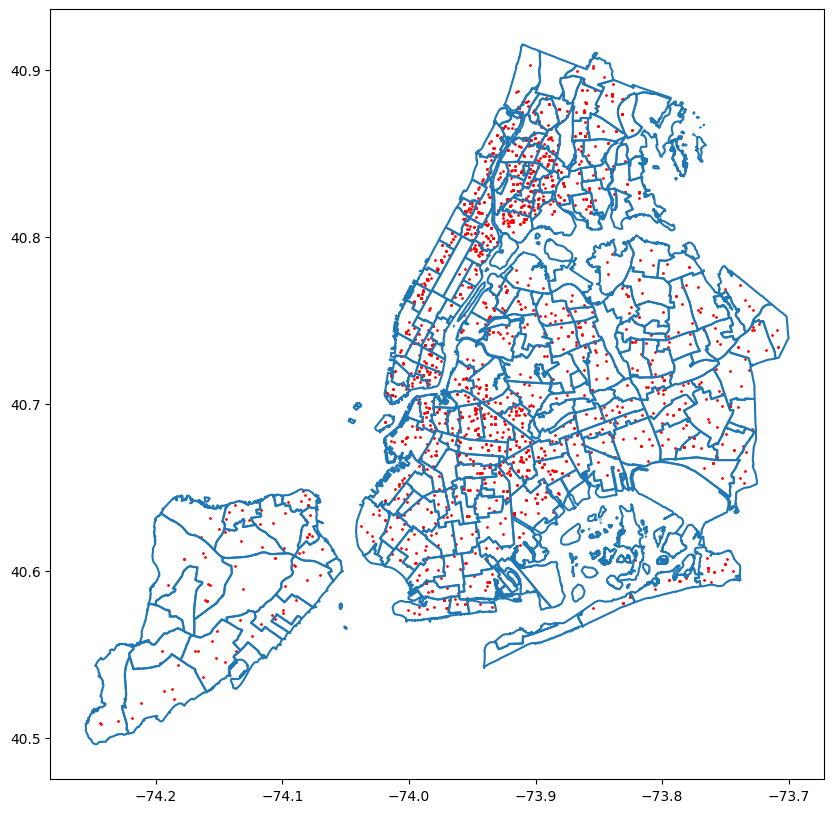

In [10]:
# map schools in each neighborhood
fig, ax = plt.subplots(figsize=(10,10))
neighborhoods.boundary.plot(ax=ax)
schools_neighborhoods.plot(ax=ax, color='red', markersize=1)
plt.show()


In [11]:
# print columns 
print(schools_neighborhoods.columns)

Index(['fiscal_year', 'system_code', 'location_code', 'location_name', 'BEDS',
       'Managed_by_name', 'location_type_description',
       'Location_Category_Description', 'Grades_text', 'Grades_final_text',
       'open_date', 'Status_descriptions', 'Primary_building_code',
       'primary_address_line_1', 'State_code', 'X_COORDINATE', 'Y_COORDINATE',
       'LONGITUDE', 'LATITUDE', 'Community_district', 'Council-district',
       'Census_tract', 'Borough_block_lot', 'NTA', 'NTA_Name',
       'Principal_Name', 'Principal_title', 'Principal_phone_number',
       'fax_number', 'Geographical_District_code',
       'Administrative_District_Code', 'Administrative_District_Name',
       'community_school_sup_name', 'Tier_3_Support_Location_Name',
       'Tier_3_Support_Leader_Name', 'Tier_2_Support_Location_Name',
       'HighSchool_Network_Location_Code', 'HighSchool_Network_Name',
       'HighSchool_Network_Superintendent', 'Community_district 1',
       'Police_precinct', 'geometry', '

In [12]:
## output to csv
schools_neighborhoods.to_csv('data/schools_neighborhoods.csv', index=False)
